<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part a: K-Means Clustering LAB


Estimated time needed: **30** minutes


__Purpose:__
The purpose of this lab exercise is to learn how to use an unsupervised learning algorithm, **K-means** using sklearn.   

__At the end of this lab you will be able to:__
> 1. Run a K-means algorithm.
> 2. Understand what parameters are customizable for the algorithm.
> 3. Know how to use the inertia curve to determine the optimal number of clusters.


### K-Means Overview

**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.  


In [1]:
# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

**Code Documentation:**

This cell sets up the environment and imports necessary libraries:

**What it does:**
- Suppresses warning messages for cleaner output
- Imports required libraries for data manipulation, visualization, and machine learning

**Libraries imported:**
- `numpy`: Numerical computing library
- `pandas`: Data manipulation and analysis
- `seaborn`: Statistical data visualization
- `matplotlib.pyplot`: Plotting library
- `sklearn.preprocessing.scale`: Feature scaling
- `sklearn.cluster.KMeans`: K-Means clustering algorithm
- `sklearn.datasets.make_blobs`: Generate synthetic clustered data
- `sklearn.utils.shuffle`: Shuffle data randomly

**Configuration:**
- `%config InlineBackend.figure_formats = ['retina']`: Sets high-resolution display for plots in Jupyter

**Code Documentation:**

**What it does:**
- Configures matplotlib and seaborn plotting parameters

**Parameters:**
- `plt.rcParams['figure.figsize'] = [6,6]`: Sets default figure size to 6x6 inches
- `sns.set_style("whitegrid")`: Applies whitegrid style to plots (white background with grid lines)
- `sns.set_context("talk")`: Sets plotting context for presentation/talk (larger fonts and elements)

In [2]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

K-means clustering is one of the most simple clustering algorithms.  One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.


**Code Documentation:**

**Function:** `display_cluster(X, km=[], num_clusters=0)`

**What it does:**
- Visualizes 2D data points and their cluster assignments
- Displays cluster centers with 'x' markers

**Parameters:**
- `X`: numpy array of shape (n_samples, 2) - data points to visualize
- `km`: KMeans object (optional) - fitted K-Means model
- `num_clusters`: int (default=0) - number of clusters; if 0, shows all points in one color

**Implementation details:**
- Uses different colors for each cluster (up to 7 colors: blue, red, green, cyan, magenta, yellow, black)
- `alpha=0.5`: Sets transparency of data points
- `s=20`: Sets size of data points
- Cluster centers marked with 'x' of size 100

**Code Documentation:**

**What it does:**
- Creates a circular dataset with 20 points arranged in a circle
- Visualizes the dataset without clustering

**Formula:**

The points are generated using parametric circle equations:

$$x = \cos(\theta)$$
$$y = \sin(\theta)$$

where $\theta \in [0, 2\pi)$ with 20 evenly spaced values.

**Parameters:**
- `angle`: 20 evenly spaced values from 0 to $2\pi$ (excluding $2\pi$)
- `X`: Resulting array of shape (20, 2) containing (x, y) coordinates
- `np.append()` with axis=0: Stacks cos and sin arrays vertically, then transposes to get column format

### Cluster starting points
Let's start by creating a simple dataset.


In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

**Code Documentation:**

**What it does:**
- Applies K-Means clustering with 2 clusters to the circular dataset
- Uses a specific random seed for reproducibility

**K-Means Parameters:**
- `n_clusters=2`: Number of clusters to form
- `random_state=10`: Random seed for reproducible results
- `n_init=1`: Number of times K-Means runs with different centroid seeds (default is 10)

**Methods:**
- `km.fit(X)`: Fits the K-Means model to data X
- `km.labels_`: Cluster labels for each data point
- `km.cluster_centers_`: Coordinates of cluster centers

**K-Means Objective:**

Minimize the within-cluster sum of squares (inertia):

$$\text{Inertia} = \sum_{i=0}^{n} \min_{\mu_j \in C} (||x_i - \mu_j||^2)$$

where:
- $x_i$ is a data point
- $\mu_j$ is the center of cluster $j$
- $C$ is the set of cluster centers
- $||\cdot||$ denotes Euclidean distance

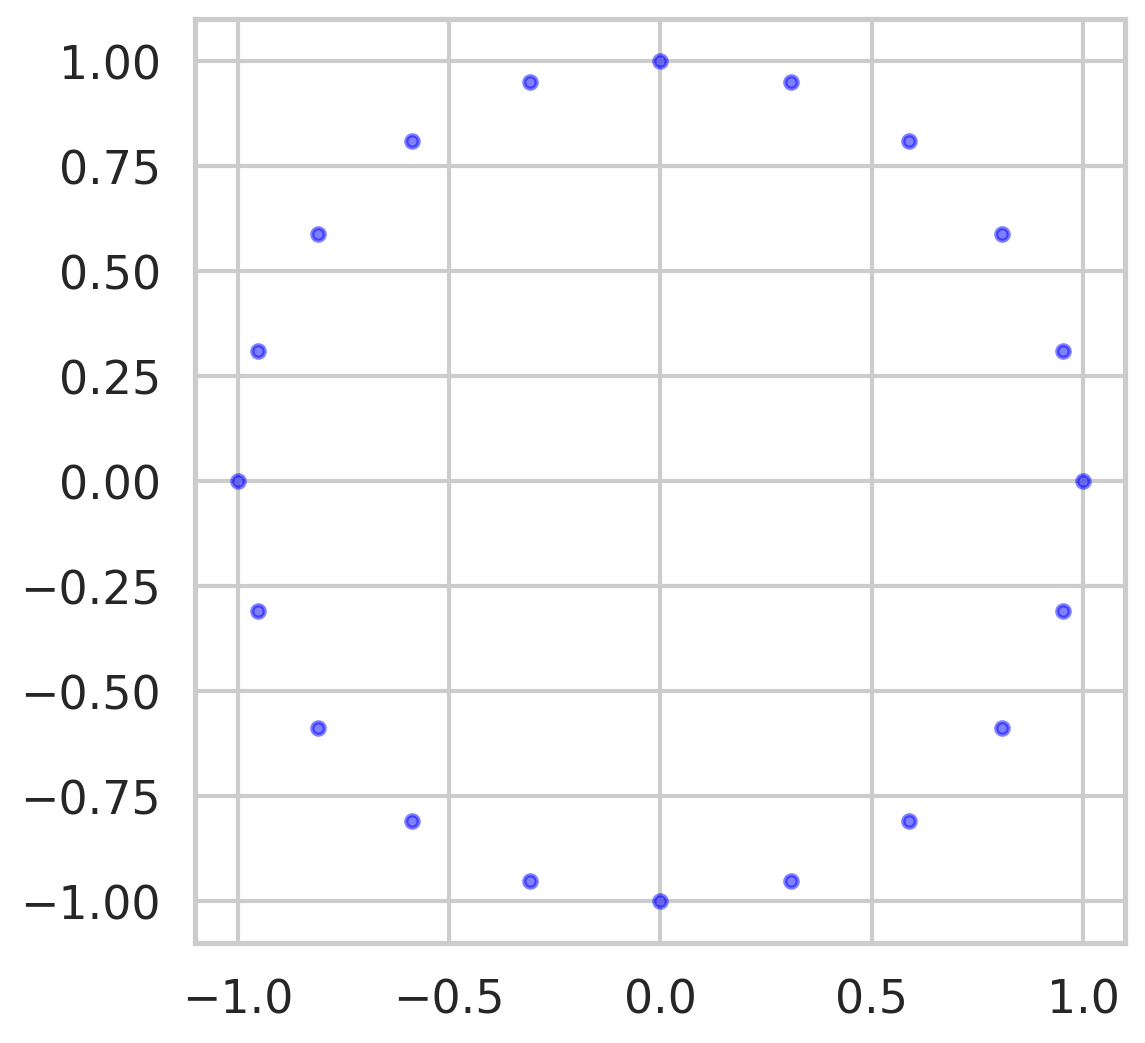

In [4]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

**Code Documentation:**

**What it does:**
- Applies K-Means clustering with a different random seed (20 instead of 10)
- Demonstrates how initialization affects final cluster assignments

**Key difference:**
- `random_state=20`: Different random seed leads to different initial centroid positions
- Result: Different final cluster assignments compared to random_state=10

**Important Note:**
K-Means is sensitive to initialization. Different random states can lead to different local minima of the objective function.

Let's now group this data into two clusters.  We will use two different random states to initialize the algorithm. Settign a the __[random state](https://numpy.org/doc/stable/reference/random/legacy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#numpy.random.RandomState)__ variable is useful for testing and allows us to seed the randomness (so we get the same results each time).


Clustering with a random state of 10:


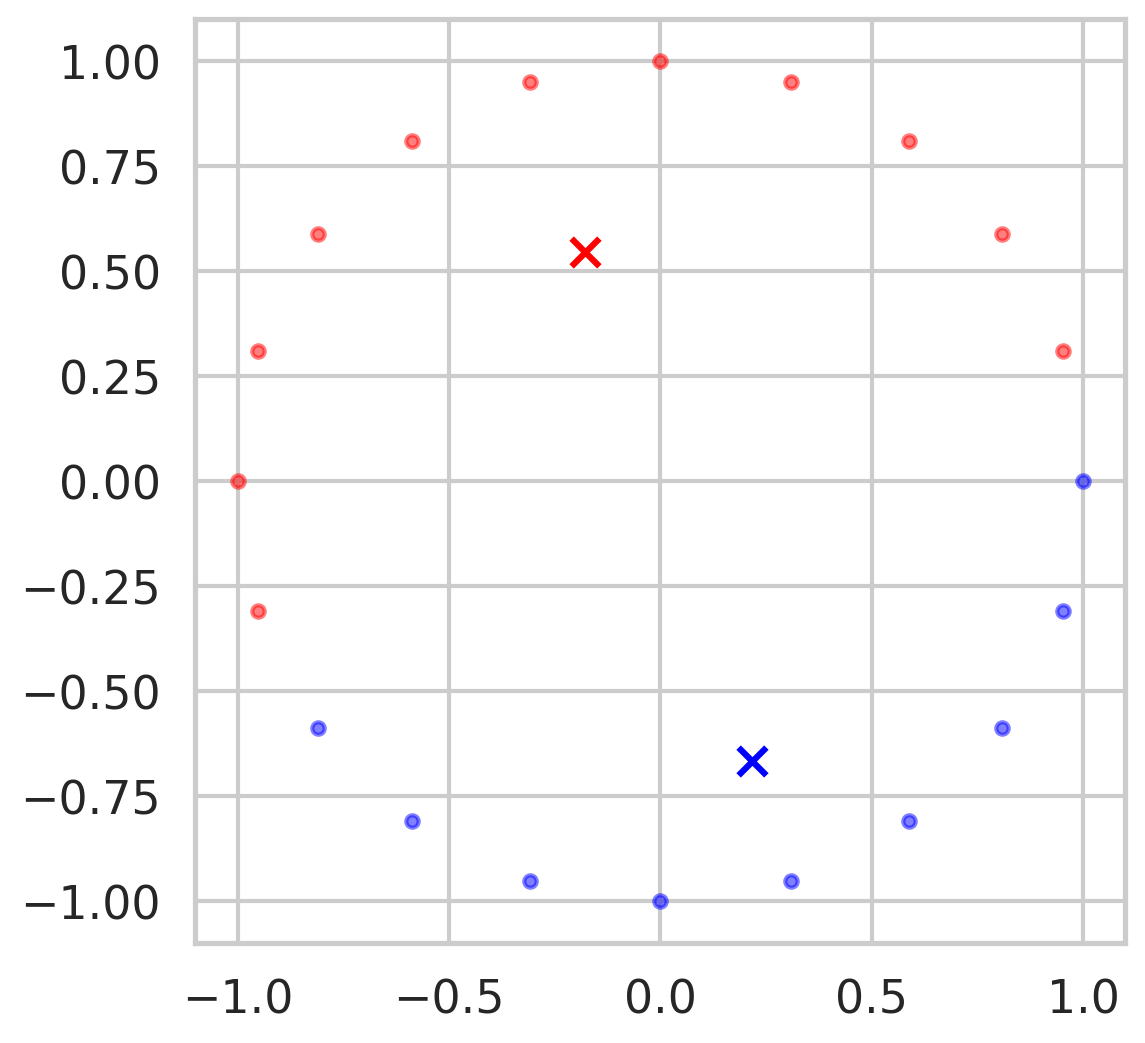

In [5]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

**Code Documentation:**

**What it does:**
- Generates synthetic clustered data using `make_blobs`
- Creates 4 distinct Gaussian clusters in 2D space

**Parameters:**
- `n_samples=1000`: Total number of data points to generate
- `n_bins=4`: Variable name (not used in function)
- `n_features=2`: Number of features (2D data)
- `cluster_std=1.0`: Standard deviation of clusters (controls cluster spread)
- `centers=[(-3,-3), (0,0), (3,3), (6,6)]`: Coordinates of the 4 cluster centers
- `shuffle=False`: Don't shuffle the data (keep ordered by cluster)
- `random_state=42`: Random seed for reproducibility

**Output:**
- `X`: Array of shape (1000, 2) containing data points
- `y`: Array of shape (1000,) containing true cluster labels (0-3)

**Data Distribution:**

Each cluster follows a Gaussian distribution:

$$p(x|\mu_j, \Sigma_j) = \frac{1}{(2\pi)^{d/2}|\Sigma_j|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu_j)^T\Sigma_j^{-1}(x-\mu_j)\right)$$

where $\mu_j$ is the cluster center and $\Sigma_j$ is the covariance matrix (here, $\sigma^2I$ with $\sigma=1.0$).

Clustering with a random state of 20:


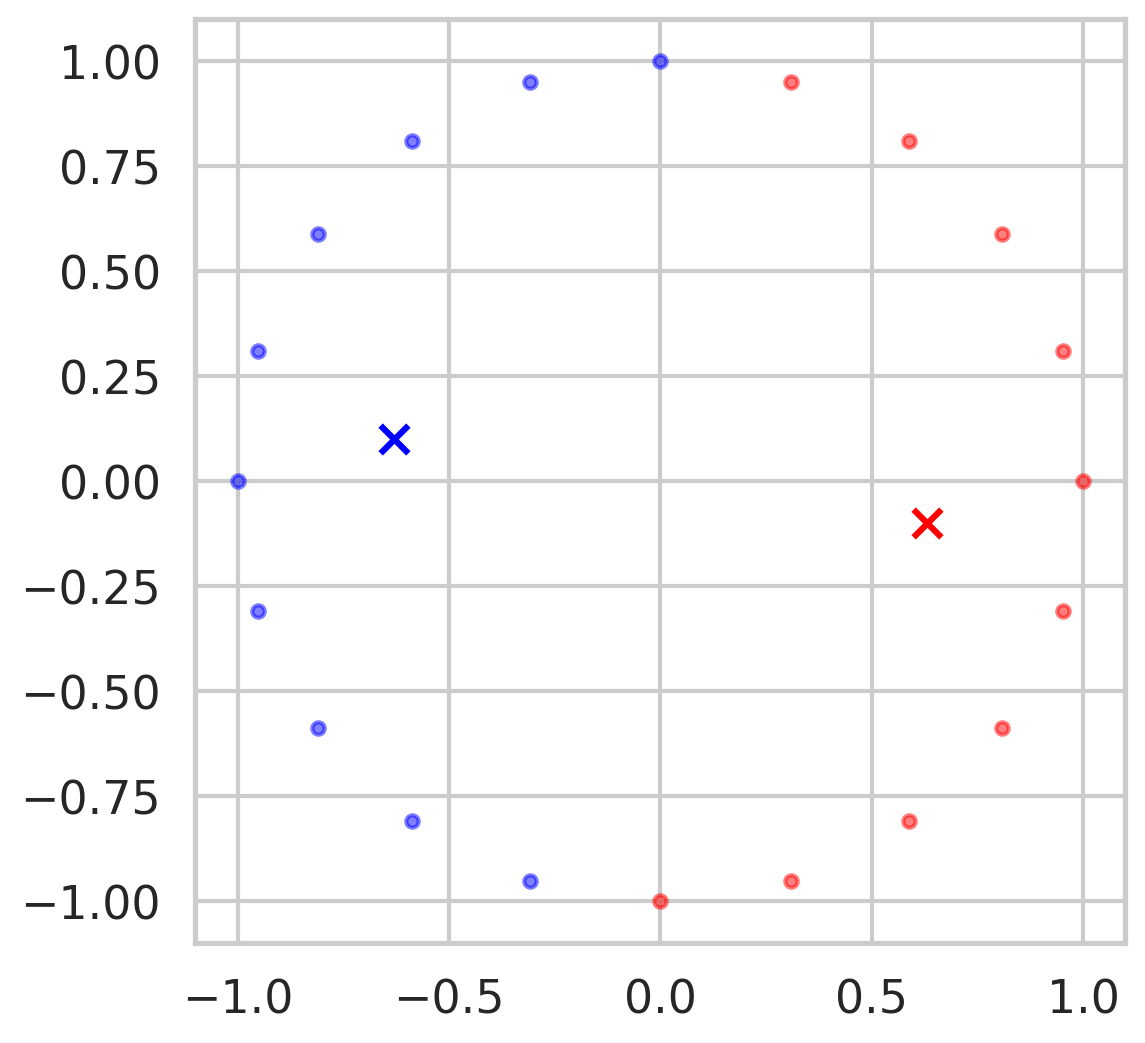

In [6]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

**Code Documentation:**

**What it does:**
- Applies K-Means with 7 clusters to data that actually has 4 natural clusters
- Demonstrates over-clustering (using more clusters than optimal)

**Parameters:**
- `num_clusters=7`: Number of clusters (too many for this dataset)
- Default `n_init=10`: Algorithm runs 10 times with different initializations and picks best result
- Default `random_state=None`: Random initialization each time

**Result:**
- Over-clustering splits natural clusters into smaller sub-clusters
- Higher number of clusters than necessary

## Question:

Why are the clusters different when we run  the K-means twice?



**Code Documentation:**

**What it does:**
- Applies K-Means with 4 clusters, matching the true number of clusters in the data
- Demonstrates appropriate clustering

**Parameters:**
- `num_clusters=4`: Number of clusters (matches the actual structure)

**Result:**
- Each natural cluster is correctly identified
- Better alignment with the true data structure compared to 7 clusters

It's because the starting points of the cluster centers have an impact on where the final clusters lie.  The starting point of the clusters is controlled by the random state.


### Determining optimium number of clusters

Let's create a new dataset that visually consists on a few clusters and try to group them.


**Code Documentation:**

**What it does:**
- Accesses the inertia attribute of the fitted K-Means model
- Inertia measures the quality of clustering

**Inertia Formula:**

$$\text{Inertia} = \sum_{i=1}^{n} ||x_i - \mu_{c_i}||^2$$

where:
- $x_i$ is the $i$-th data point
- $c_i$ is the cluster assignment of $x_i$
- $\mu_{c_i}$ is the centroid of the cluster to which $x_i$ belongs
- $||\cdot||$ is the Euclidean distance

**Interpretation:**
- Lower inertia = tighter clusters (points closer to their centroids)
- Inertia always decreases as number of clusters increases
- When k=n (clusters equal data points), inertia=0

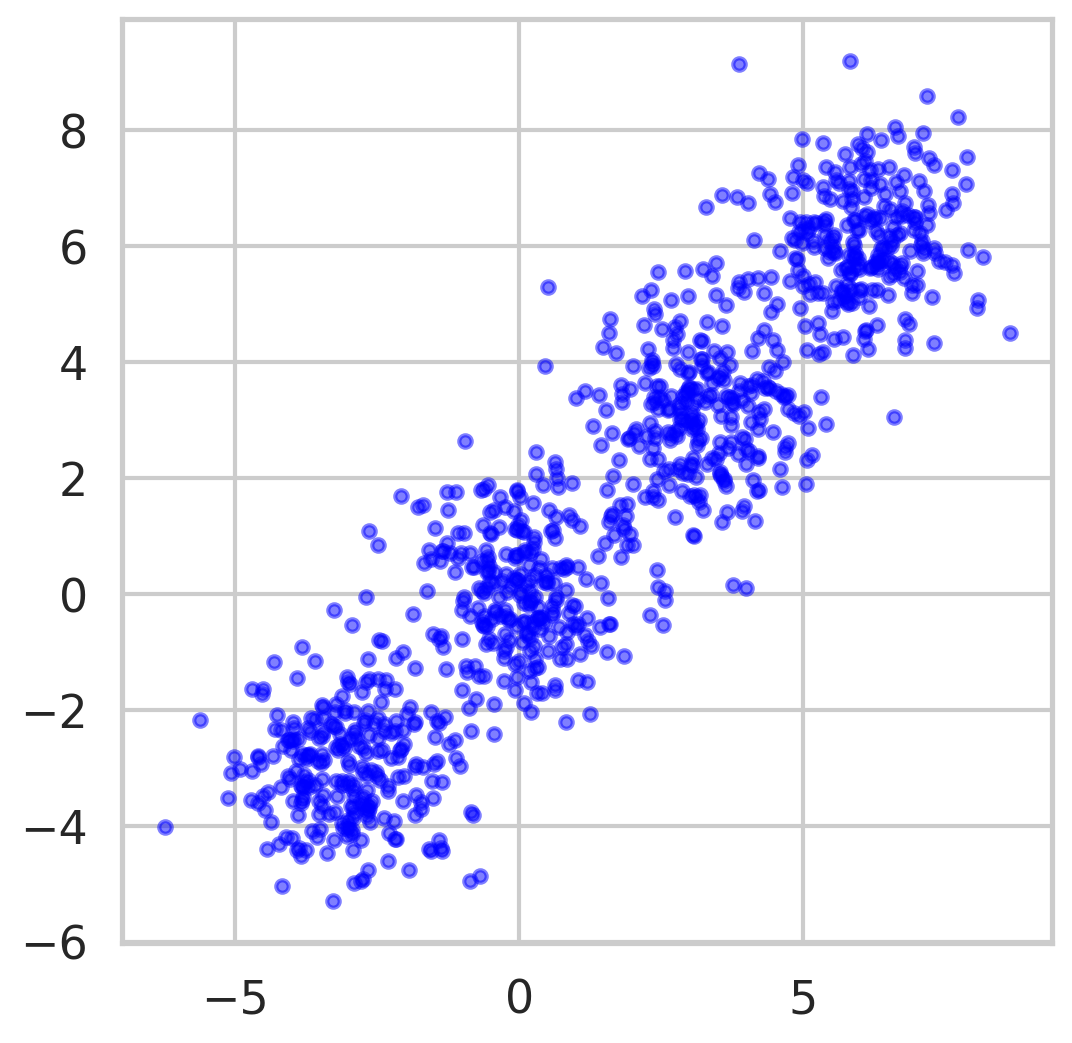

In [7]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

**Code Documentation:**

**What it does:**
- Calculates inertia for K-Means with k=1 to k=10 clusters
- Creates an elbow plot to determine optimal number of clusters

**Algorithm:**
1. Loop through cluster numbers from 1 to 10
2. For each k, fit K-Means and store inertia
3. Plot inertia vs. number of clusters
4. Look for "elbow" point where inertia decrease slows

**Parameters:**
- `list_num_clusters`: Range [1, 2, 3, ..., 10]
- `inertia`: List storing inertia values for each k

**Elbow Method:**

The optimal k is where the rate of inertia decrease changes significantly:

$$\text{Rate of change} = \frac{d(\text{Inertia})}{dk}$$

The "elbow" occurs where this rate transitions from steep to gradual, indicating diminishing returns from adding more clusters.

**Visualization:**
- X-axis: Number of clusters
- Y-axis: Inertia (sum of squared distances)

How many clusters do you observe?


Let's run K-means with seven clusters.


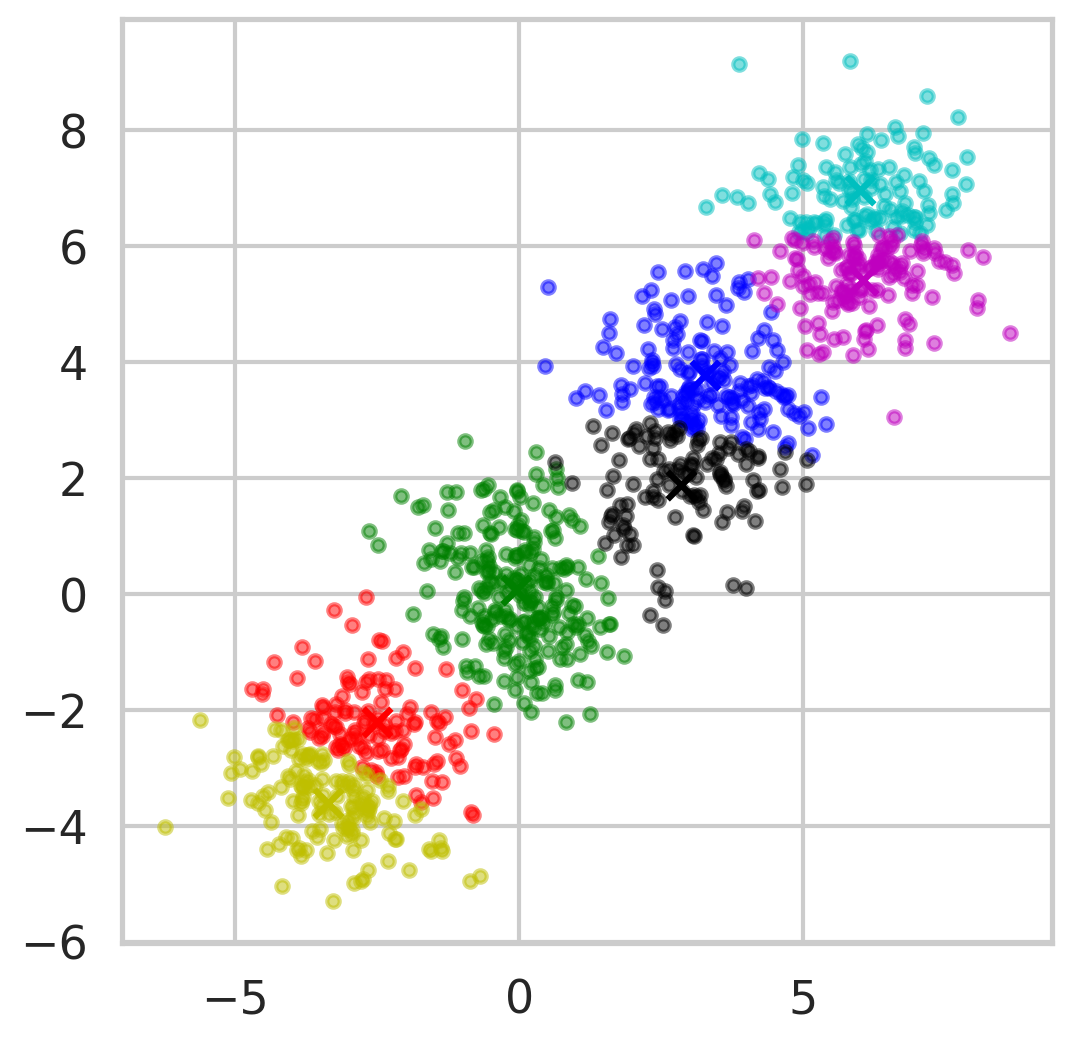

In [8]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

**Code Documentation:**

**What it does:**
- Downloads and loads an image of bell peppers from a URL
- Displays the image using matplotlib

**Libraries used:**
- `PIL.Image`: Python Imaging Library for image processing
- `urllib.request`: For downloading image from URL
- `numpy`: Converts image to array format

**Process:**
1. Opens URL connection using `urllib.request.urlopen()`
2. Reads image data with PIL `Image.open()`
3. Converts PIL image to numpy array with `np.array()`
4. Displays image with `plt.imshow()`

**Parameters:**
- `url`: Image URL (JPEG format)
- `plt.axis('off')`: Hides axis labels and ticks for cleaner display

**Note:** The commented code shows an alternative method using `plt.imread()` which is simpler but may have compatibility issues.

**Code Documentation:**

**What it does:**
- Displays the shape (dimensions) of the image array

**Output interpretation:**
- Shape: `(480, 640, 3)`
  - 480: Image height in pixels
  - 640: Image width in pixels
  - 3: Number of color channels (RGB)

**Image representation:**

Each pixel is represented as a vector in RGB color space:

$$\text{pixel}_{i,j} = [R_{i,j}, G_{i,j}, B_{i,j}]$$

where:
- $R_{i,j} \in [0, 255]$: Red channel intensity
- $G_{i,j} \in [0, 255]$: Green channel intensity
- $B_{i,j} \in [0, 255]$: Blue channel intensity
- $(i,j)$ is the pixel position (row, column)

**Total pixels:** $480 \times 640 = 307,200$ pixels

Now let's re-run the algorithm with four clusters.


**Code Documentation:**

**What it does:**
- Creates and displays a single-color pixel based on RGB values
- Demonstrates how RGB values combine to create colors

**Parameters:**
- `R=35`: Red channel intensity (0-255)
- `G=95`: Green channel intensity (0-255)
- `B=131`: Blue channel intensity (0-255)

**Process:**
1. Creates numpy array with RGB values
2. Converts to unsigned 8-bit integer (`uint8`) format
3. Wraps in nested lists to create a 1x1 pixel "image"
4. Displays the color

**RGB Color Space:**

$$\text{Color} = (R, G, B)$$

**Total possible colors:**

$$\text{Total colors} = 256^3 = 16,777,216$$

This is because each channel has 256 possible values (0-255), and there are 3 independent channels.

**Example color:** RGB(35, 95, 131) creates a blue-ish color (high B value, moderate G, low R)

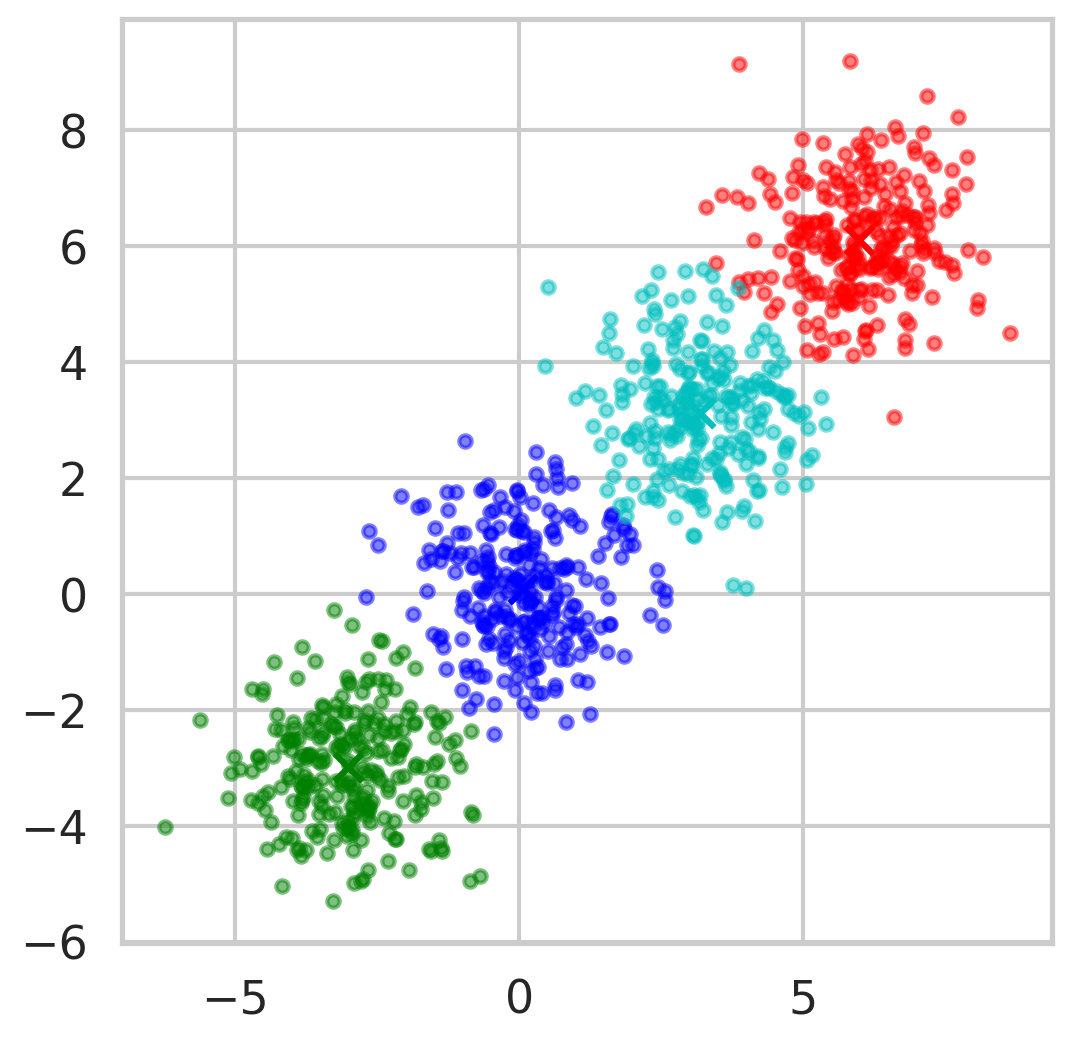

In [9]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

**Code Documentation:**

**What it does:**
- Reshapes the 3D image array into a 2D array (flattens spatial dimensions)
- Each row represents one pixel with its RGB values

**Reshaping operation:**

$$\text{img\_flat} = \text{reshape}(480 \times 640 \times 3) \rightarrow (307200 \times 3)$$

**Parameters:**
- `img.reshape(-1, 3)`: 
  - `-1`: Automatically calculate first dimension (480×640 = 307,200)
  - `3`: Keep 3 columns for RGB channels

**Result:**
- Original: 480 rows × 640 columns × 3 channels
- Flattened: 307,200 rows × 3 columns
- Each row = [R, G, B] values for one pixel

**Purpose:**
- Converts image to tabular format suitable for K-Means clustering
- Each pixel becomes a point in 3D RGB color space

**Display:**
- Shows first 5 pixels' RGB values

Should we use four or seven clusters?  


**Code Documentation:**

**What it does:**
- Verifies the shape of the flattened image array

**Output:**
- Shape: `(307200, 3)`
  - 307,200 rows: Total number of pixels (480 × 640)
  - 3 columns: RGB color channels

**Calculation:**

$$\text{Number of pixels} = \text{height} \times \text{width} = 480 \times 640 = 307,200$$

This confirms the reshape operation preserved all pixel data while converting from 3D to 2D format.

- In this case it may be visually obvious that four clusters is better than seven.  
- This is because we can easily view the data in two dimensional space.  
- However, real world data usually has more than two dimensions.  
- A dataset with a higher dimensional space is hard to visualize.  
- A way of solving this is to plot the **inertia** 

**inertia**: (sum of squared error between each point and its cluster center) as a function of the number of clusters. 


**Code Documentation:**

**What it does:**
- Applies K-Means clustering to the image pixels in RGB color space
- Groups the 307,200 pixels into 8 color clusters

**Parameters:**
- `n_clusters=8`: Creates 8 cluster centers (8 dominant colors)
- `random_state=0`: Random seed for reproducibility

**Process:**
- Each pixel (R, G, B) is treated as a point in 3D color space
- K-Means finds 8 representative colors (cluster centers)
- Each pixel is assigned to its nearest color cluster

**Result:**
- `kmeans.cluster_centers_`: 8 RGB color vectors representing dominant colors
- `kmeans.labels_`: Cluster assignment (0-7) for each of 307,200 pixels

**Application:**
- Color quantization: Reduces 16.7 million possible colors to just 8
- Image compression: Store cluster ID (3 bits) instead of full RGB (24 bits)

In [10]:
km.inertia_

1880.174402277563

**Code Documentation:**

**What it does:**
- Replaces each pixel's original RGB values with its cluster center RGB values
- Creates a quantized version of the image using only 8 colors

**Algorithm:**
1. Create a copy of the flattened image (`img_flat2`)
2. For each cluster (i = 0 to 7):
   - Find all pixels assigned to cluster i
   - Replace their RGB values with the cluster center's RGB values

**Process:**

For each pixel $p$:
$$\text{new\_RGB}_p = \mu_{c_p}$$

where:
- $c_p$ is the cluster assignment of pixel $p$
- $\mu_{c_p}$ is the RGB color of cluster center $c_p$

**Result:**
- All pixels in the same cluster now have identical RGB values
- Image uses only 8 distinct colors (the cluster centers)
- This is called **color quantization** or **image posterization**

### Problem 1:

Write code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.


**Code Documentation:**

**What it does:**
- Reshapes the quantized image back to original 3D dimensions
- Displays the color-quantized image

**Reshaping operation:**

$$\text{img2} = \text{reshape}(307200 \times 3) \rightarrow (480 \times 640 \times 3)$$

**Process:**
- Takes the flattened quantized array (307,200 × 3)
- Reshapes back to original image dimensions (480 × 640 × 3)
- Uses `img.shape` to ensure matching dimensions

**Result:**
- Image with only 8 distinct colors instead of potentially millions
- Visual quality is reduced but major features are preserved
- Demonstrates image compression through clustering

**Compression ratio:**

$$\text{Bits per pixel (original)} = 24 \text{ bits (8 bits × 3 channels)}$$
$$\text{Bits per pixel (quantized)} = 3 \text{ bits (}\log_2(8) = 3\text{)}$$
$$\text{Compression ratio} = \frac{24}{3} = 8:1$$

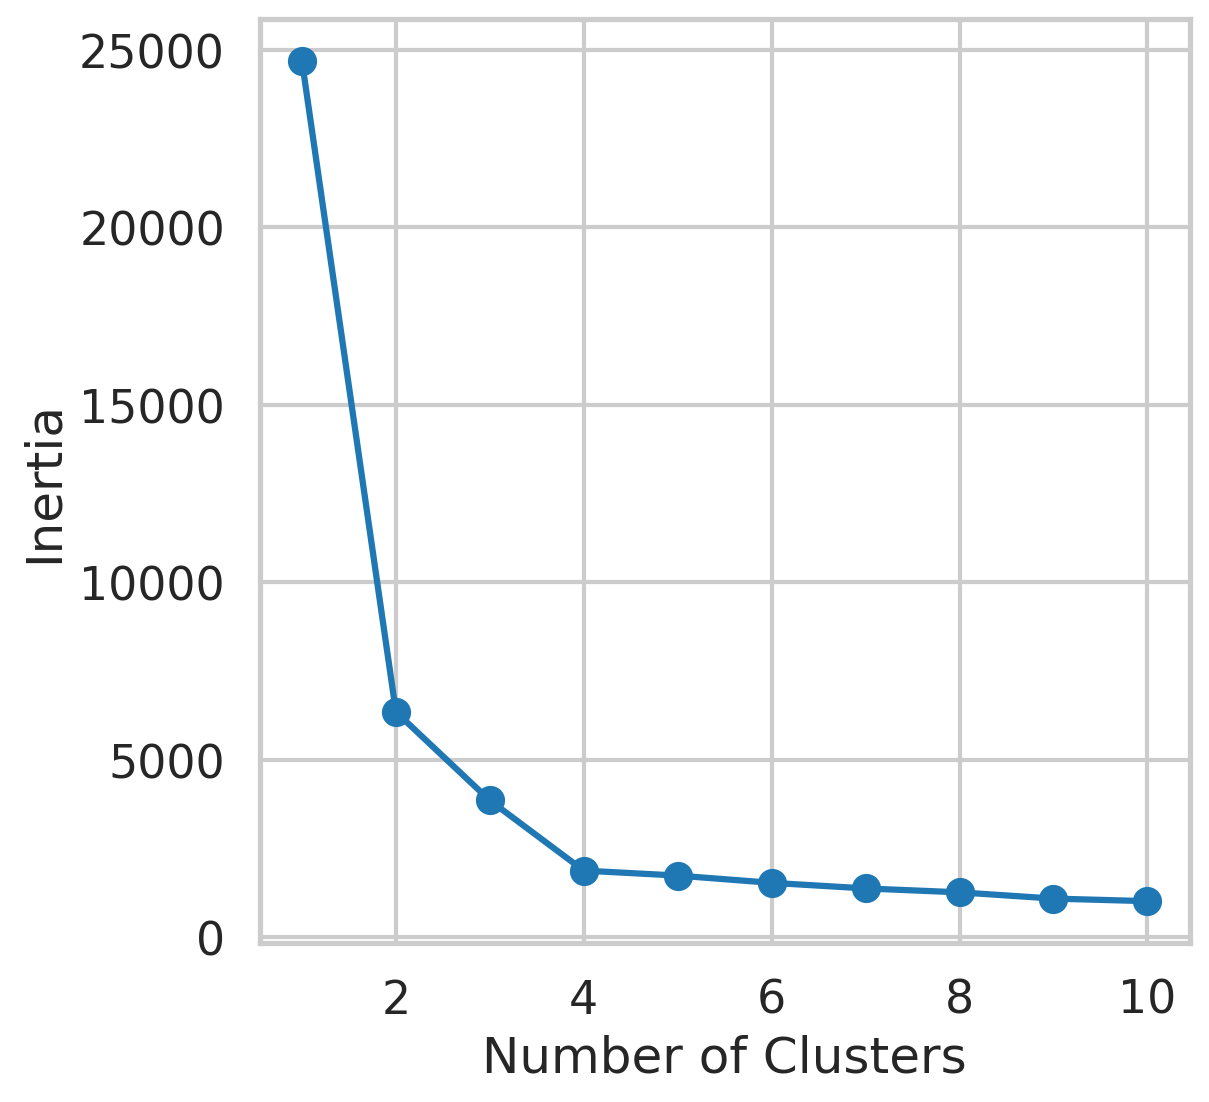

In [11]:
### BEGIN SOLUTION
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

**Code Documentation:**

**Function:** `image_cluster(img, k)`

**What it does:**
- Performs color quantization on an image using K-Means clustering
- Returns both the quantized image and the clustering quality metric

**Parameters:**
- `img`: numpy array of shape (height, width, 3) - input RGB image
- `k`: int - number of color clusters (distinct colors in output)

**Returns:**
- `img2`: numpy array - quantized image with k colors
- `kmeans.inertia_`: float - sum of squared distances to cluster centers

**Process:**
1. Flatten image from (h, w, 3) to (h×w, 3)
2. Fit K-Means with k clusters
3. Replace each pixel with its cluster center color
4. Reshape back to (h, w, 3)
5. Return quantized image and inertia

**Inertia metric:**

$$\text{Inertia} = \sum_{i=1}^{n} ||\text{RGB}_i - \mu_{c_i}||^2$$

- Measures how well the k colors represent all original colors
- Lower inertia = better color representation

Where does the elbow of the curve occur?

What do you think the inertia would be if you have the same number of clusters and data points?


**Code Documentation:**

**What it does:**
- Tests color quantization with different numbers of clusters (k = 2, 4, 6, ..., 20)
- Stores quantized images and inertia values for analysis

**Parameters:**
- `k_vals = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]`: Range of k values to test
- `img_list`: Stores quantized images for each k
- `inertia`: Stores inertia values for each k

**Process:**
1. Loop through each k value
2. Call `image_cluster(img, k)` to quantize image
3. Store resulting image and inertia
4. Build dataset for elbow curve analysis

**Purpose:**
- Determine optimal number of colors for quantization
- Balance between image quality (higher k) and compression (lower k)
- Prepare data for elbow method analysis

**Time complexity:**
- K-Means is computationally expensive: O(n × k × i × d)
  - n = 307,200 pixels
  - k = number of clusters
  - i = number of iterations
  - d = 3 dimensions (RGB)

**Code Documentation:**

**What it does:**
- Creates an elbow curve plot to find optimal number of color clusters
- Visualizes trade-off between compression (fewer colors) and quality (lower inertia)

**Plot elements:**
- X-axis: k (number of color clusters)
- Y-axis: Inertia (sum of squared color distances)
- Line plot: Shows trend
- Scatter points: Shows actual data points

**Elbow method:**

Look for the "elbow" point where:
$$\frac{\Delta \text{Inertia}}{\Delta k} \text{ changes significantly}$$

**Interpretation:**
- Steep decrease: Adding clusters significantly improves representation
- Gradual decrease: Diminishing returns from additional clusters
- Elbow point: Optimal balance between quality and number of colors

**Expected pattern:**
- Inertia decreases as k increases
- Rate of decrease slows down
- Beyond optimal k, improvements become marginal

### Clustering Colors from an Image


The next few exercises use an image of bell peppers. Let's start by loading it:


**Code Documentation:**

**What it does:**
- Creates a 5×2 grid displaying all quantized images for different k values
- Visual comparison of image quality vs. number of colors

**Parameters:**
- `plt.figure(figsize=[10,20])`: Creates large figure (10×20 inches)
- `plt.subplot(5,2,i+1)`: Creates grid with 5 rows, 2 columns
- Loop index `i`: Goes from 0 to 9 (10 different k values)

**Grid layout:**
- Total subplots: 10 (matching number of k values tested)
- Each subplot shows image quantized with specific k
- Title shows k value (k = 2, 4, 6, ..., 20)

**Purpose:**
- Visual assessment of color quantization quality
- Compare how different k values affect image appearance
- Complement quantitative elbow curve with qualitative visual analysis

**Subplot formula:**

Subplot position in grid:
$$\text{position} = i + 1$$

where $i \in \{0, 1, 2, ..., 9\}$, giving positions 1-10 in a 5×2 grid.

**Expected observation:**
- Low k (e.g., 2, 4): Posterized effect, loss of detail
- High k (e.g., 18, 20): Better detail preservation, more natural appearance

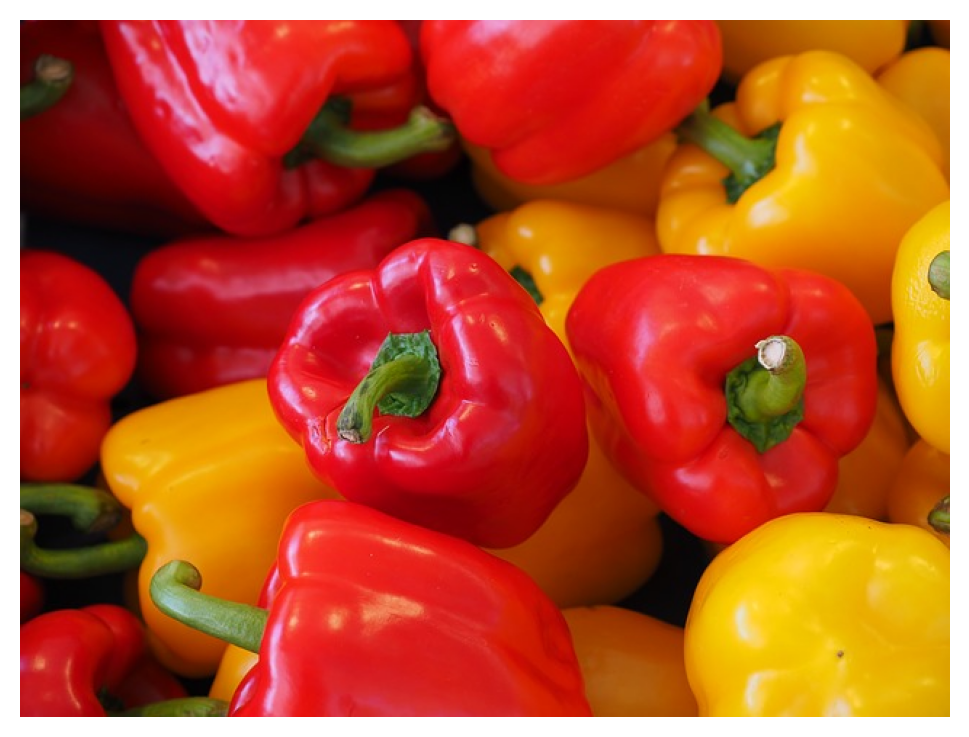

In [18]:
# img = plt.imread('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/peppers.jpg', format='jpeg')
# plt.imshow(img)
# plt.axis('off')
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request

# The URL of the image
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/peppers.jpg'

# 1. Open the URL and read the image data
with urllib.request.urlopen(url) as url_response:
    # 2. Open the image data with Pillow
    img = Image.open(url_response)
    # 3. Convert the Pillow image to a NumPy array
    img = np.array(img)

# Now, you can display the image array with matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
img.shape

(480, 640, 3)

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.


(np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(-0.5))

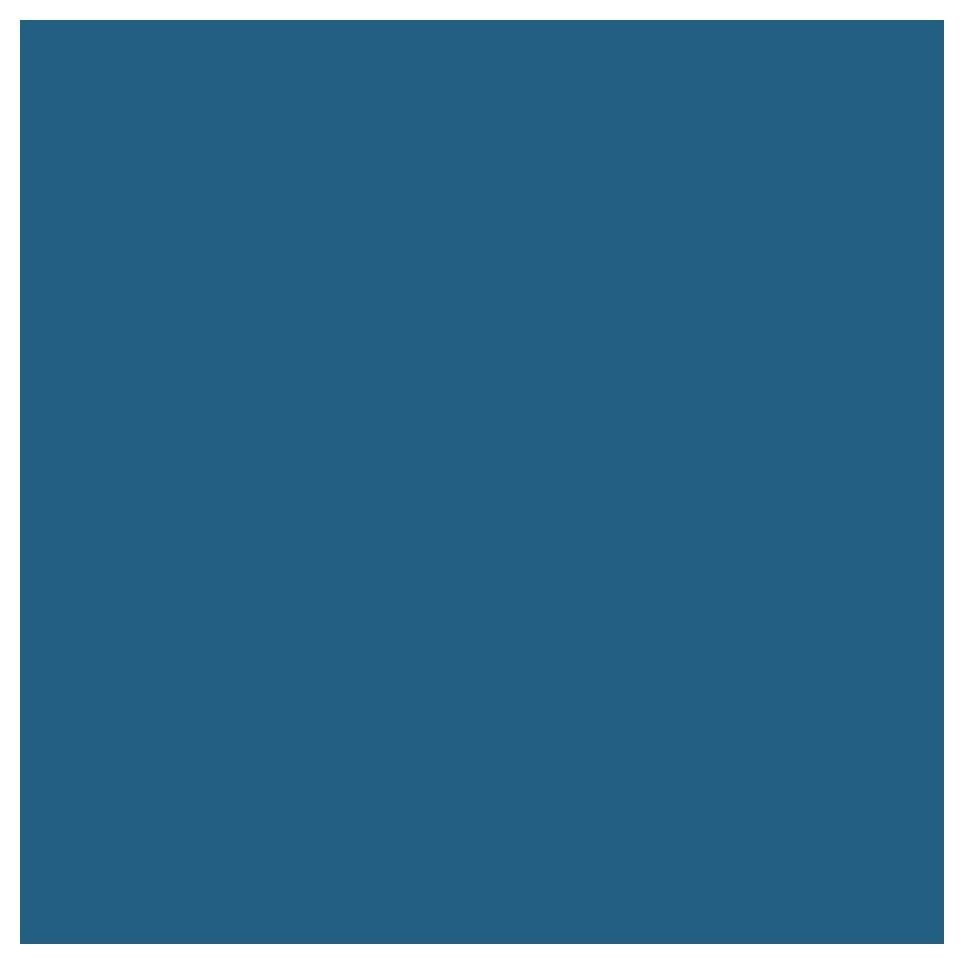

In [20]:
# assign values for the RGB.  Each value should be between 0 and 255
R = 35
G = 95
B = 131
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off')

First we will reshape the image into a table that has a pixel per row and each column represents the red, green and blue channel.


In [21]:
img_flat = img.reshape(-1, 3)
img_flat[:5,:]

array([[21, 16, 23],
       [28, 15, 22],
       [45, 14, 22],
       [65, 16, 22],
       [84, 14, 24]], dtype=uint8)

Since there are 480x640 pixels we get 307,200 rows! 


In [22]:
img_flat.shape

(307200, 3)

Let's run K-means with 8 clusters.


In [23]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

Now let's replace each row with its closest cluster center.


In [24]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

We now need to reshape the data from 307,200 x 3 to 480 x 640 x 3


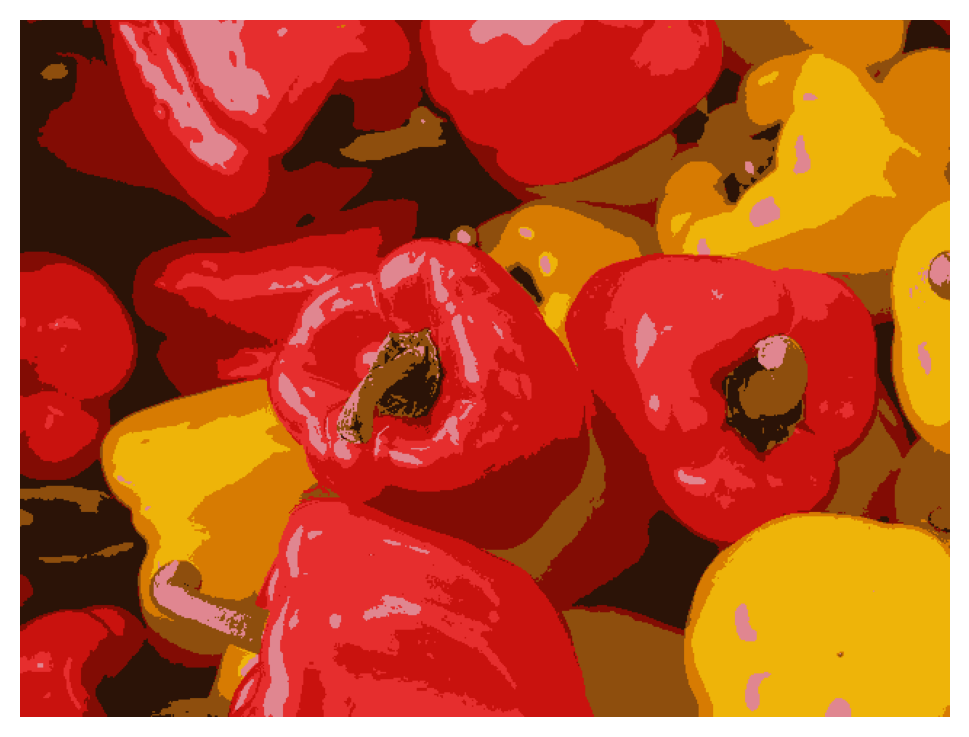

In [25]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

### Problem 2:
Write a function that receives the image and number of clusters (k), and returns (1) the image quantized into k colors, and (2) the inertia.


In [26]:
### BEGIN SOLUTION
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_
### END SOLUTION

### Problem 3:

Call the function for k between 2 and 20, and draw an inertia curve. What is the optimum number of clusters?


In [27]:
### BEGIN SOLUTION
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)  

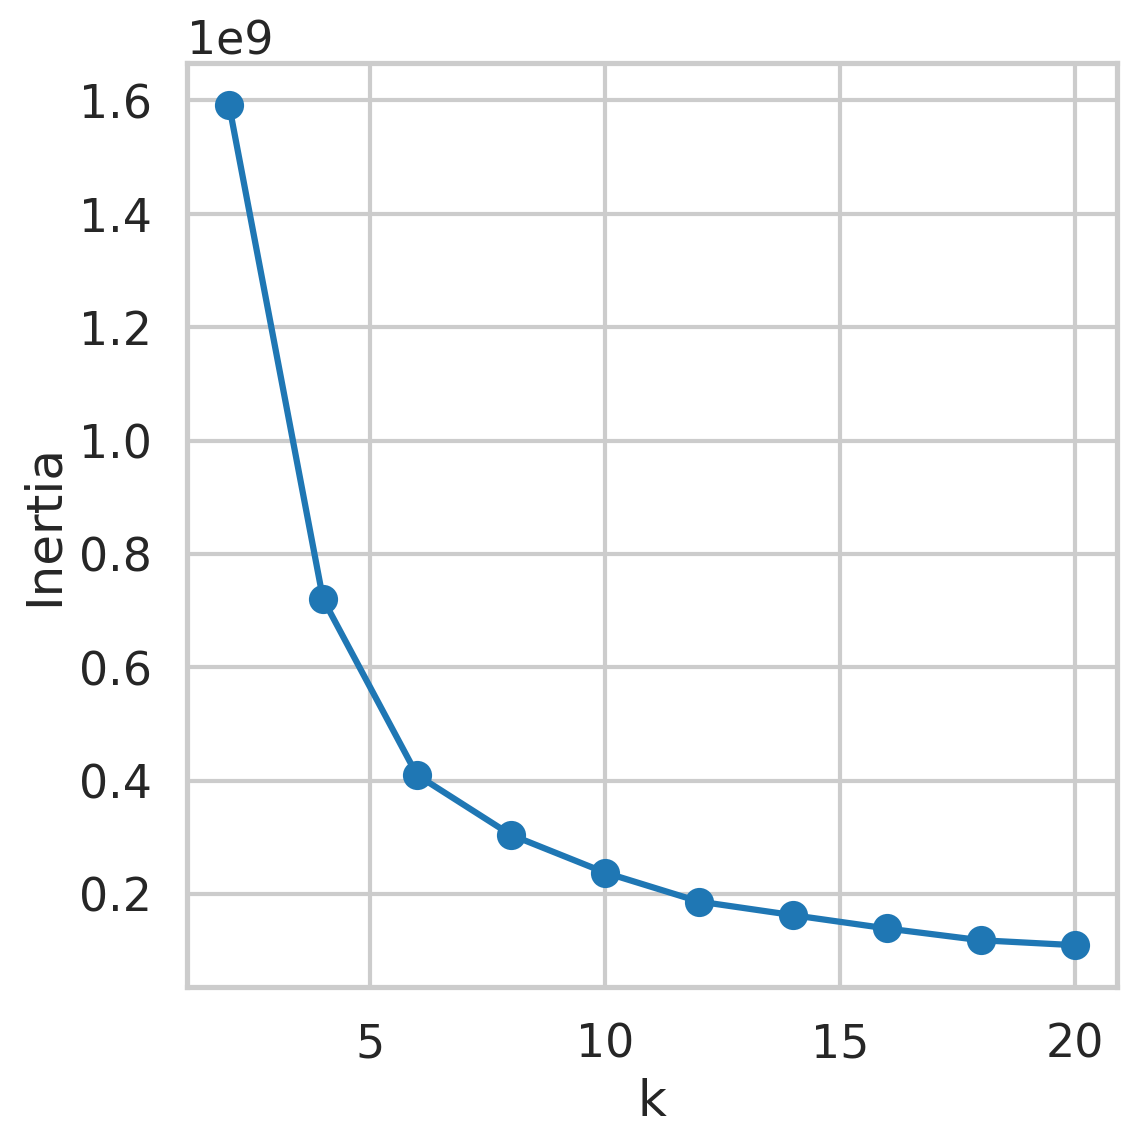

In [28]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');
### END SOLUTION

Sometimes, the elbow method does not yield a clear decision (for example, if the elbow is not clear and sharp, or is ambiguous).  In such cases, alternatives such as the [silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) can be helpful.


### Problem 4:
Plot in a grid all the images for the different k values.


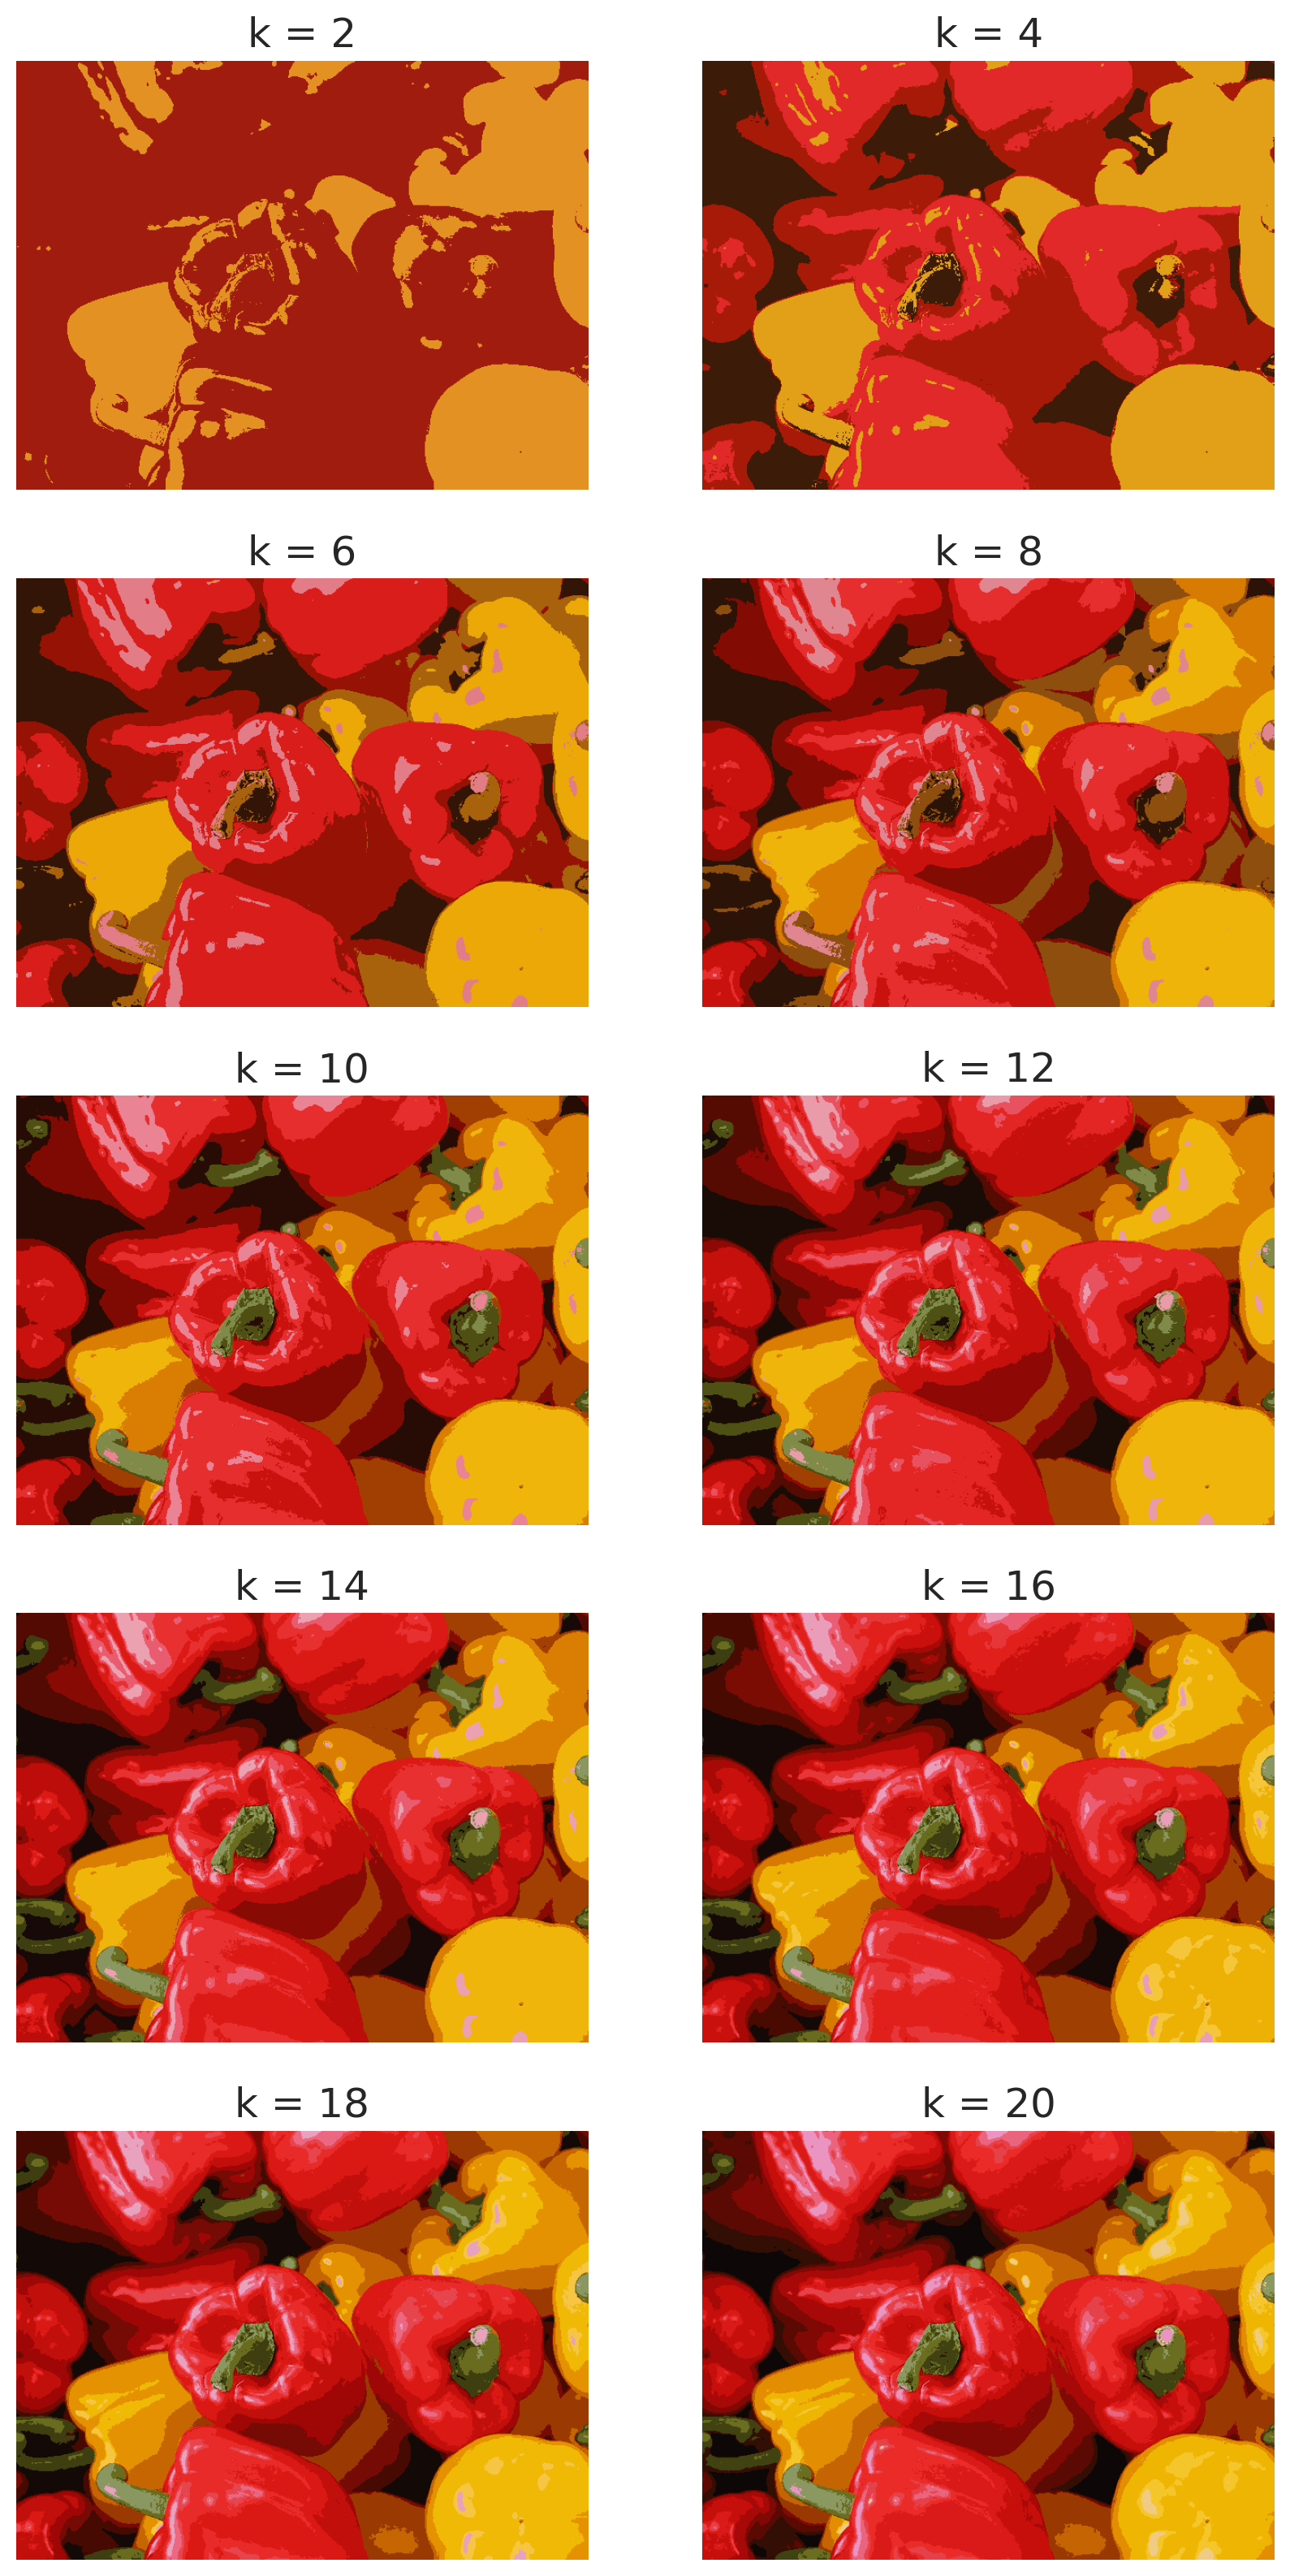

In [29]:
### BEGIN SOLUTION
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation
